In [2]:
import torch
from torch.utils.data import DataLoader
import pandas as pd
import torch.optim as optim
import matplotlib.pyplot as plt
import seaborn as sns
from torch import nn
from torch.utils.data import Dataset,TensorDataset

In [3]:
device = ("cuda" if torch.cuda.is_available() else "cpu")

In [6]:
data = pd.read_csv("data/comb_PM25_wind_Hanoi_2018_v3.csv")
print(data.head(1))

                  DATE  PM2.5    T2MDEW       T2M         PS        TQV  \
0  2018-01-01 01:00:00   69.2  10.79443  13.64376  100865.09  34.909637   

        TQL      H1000     DISPH  FRCAN       HLML      RHOA  CIG  WS  CLDCR  \
0  0.009235  160.25461  0.256226    1.0  63.907425  1.216159  NaN NaN    NaN   

   v_2m  v_50m  v_850  
0   NaN    NaN    NaN  


In [7]:
data = data.set_index("DATE")

In [8]:
for col in data.columns:
  data[col].fillna(data[col].median(), inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8116 entries, 2018-01-01 01:00:00 to 2018-12-31 00:00:00
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PM2.5   8116 non-null   float64
 1   T2MDEW  8116 non-null   float64
 2   T2M     8116 non-null   float64
 3   PS      8116 non-null   float64
 4   TQV     8116 non-null   float64
 5   TQL     8116 non-null   float64
 6   H1000   8116 non-null   float64
 7   DISPH   8116 non-null   float64
 8   FRCAN   8116 non-null   float64
 9   HLML    8116 non-null   float64
 10  RHOA    8116 non-null   float64
 11  CIG     8116 non-null   float64
 12  WS      8116 non-null   float64
 13  CLDCR   8116 non-null   float64
 14  v_2m    0 non-null      float64
 15  v_50m   0 non-null      float64
 16  v_850   0 non-null      float64
dtypes: float64(17)
memory usage: 1.1+ MB


/tmp/ipykernel_48621/2211307647.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].median(), inplace=True)
/tmp/ipykernel_48621/2211307647.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

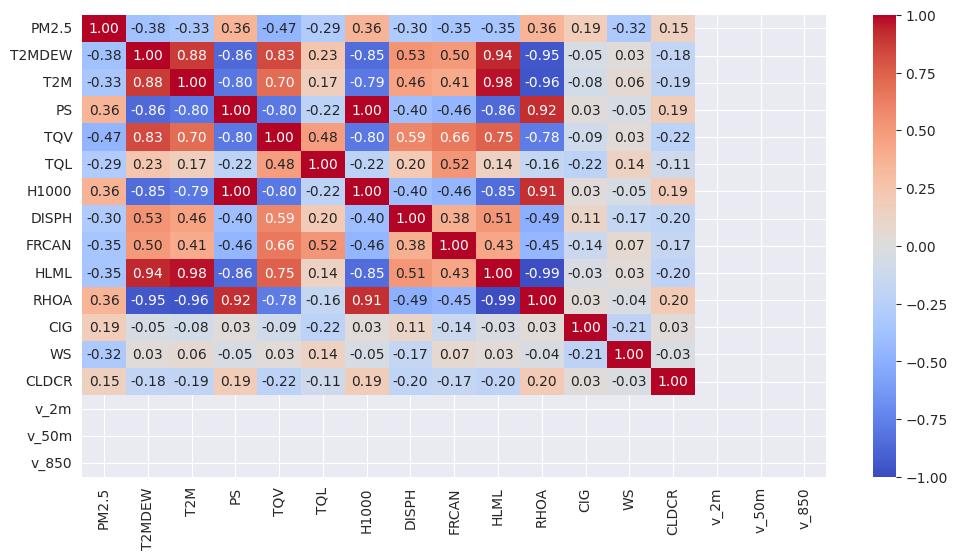

In [9]:
matric = data.corr()
plt.figure(figsize = (12,6))
sns.heatmap(data = matric, vmin = -1, vmax = 1,center = 0, cmap = "coolwarm",annot = True, fmt = "0.2f")
plt.show()

In [10]:
data.columns = data.columns.str.lower()
data.head()

,pm2.5,t2mdew,t2m,ps,tqv,tql,h1000,disph,frcan,hlml,rhoa,cig,ws,cldcr,v_2m,v_50m,v_850
DATE,,,,,,,,,,,,,,,,,
2018-01-01 01:00:00,69.2,10.79443,13.64376,100865.09,34.909637,0.009235,160.25461,0.256226,1.000000,63.907425,1.216159,945.0,2.6,0.4,NaN,NaN,NaN
2018-01-01 02:00:00,75.5,10.72836,13.33932,100819.56,35.195385,0.006260,156.44829,0.256226,1.000000,63.832478,1.217125,945.0,2.6,0.4,NaN,NaN,NaN
2018-01-01 03:00:00,90.2,10.60630,13.09753,100793.71,35.590984,0.003489,154.54437,0.256104,0.993164,63.766266,1.218085,945.0,2.6,0.4,NaN,NaN,NaN
2018-01-01 04:00:00,97.6,10.50967,12.81360,100791.80,35.827934,0.002314,154.16837,0.255981,0.927490,63.718185,1.218972,945.0,2.6,0.4,NaN,NaN,NaN
2018-01-01 05:00:00,89.1,10.49365,12.71010,100808.45,35.953880,0.001480,155.72943,0.255859,0.786133,63.684280,1.219831,945.0,2.6,0.4,NaN,NaN,NaN


{'whiskers': [<matplotlib.lines.Line2D at 0x7d78af6330d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7d78af630790>,
 'boxes': [<matplotlib.lines.Line2D at 0x7d78ad9b6bc0>],
 'medians': [<matplotlib.lines.Line2D at 0x7d78af632cb0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7d78ad7340a0>],
 'means': []}

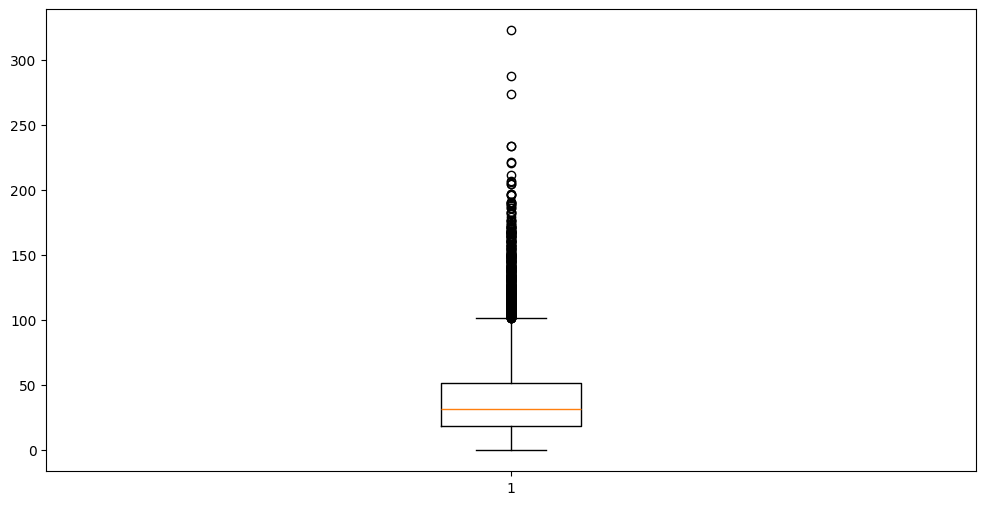

In [9]:
plt.figure(figsize= (12,6))
plt.boxplot(data["pm2.5"])

In [10]:
Q1 = data["pm2.5"].quantile(0.25)
Q3 = data["pm2.5"].quantile(0.75)
IQR = Q3 - Q1

# Loại bỏ outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
data = data[(data["pm2.5"] >= lower_bound) & (data["pm2.5"] <= upper_bound)]

{'whiskers': [<matplotlib.lines.Line2D at 0x7d78ad5ea650>,
 'caps': [<matplotlib.lines.Line2D at 0x7d78ad5eab90>,
 'boxes': [<matplotlib.lines.Line2D at 0x7d78ad5ea3b0>],
 'medians': [<matplotlib.lines.Line2D at 0x7d78ad5eb0d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7d78ad5eb370>],
 'means': []}

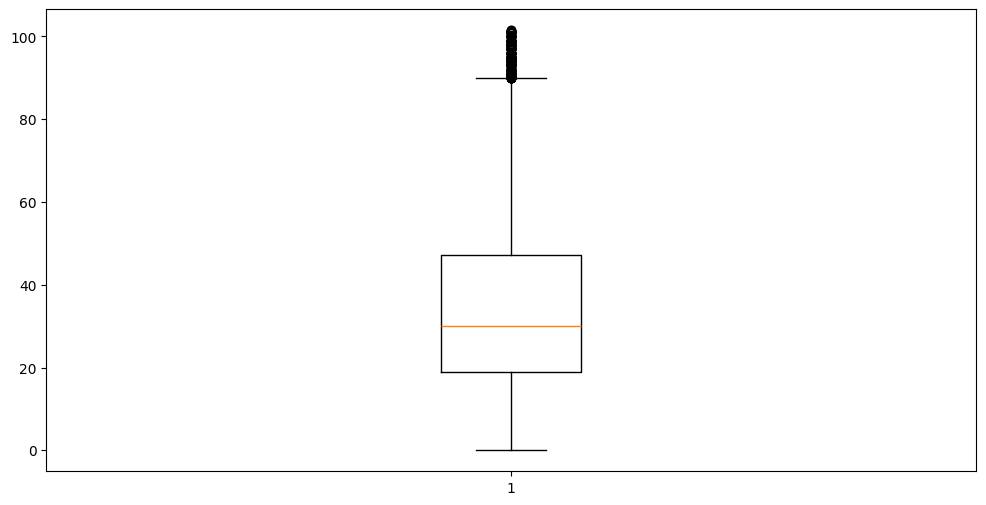

In [11]:
plt.figure(figsize= (12,6))
plt.boxplot(data["pm2.5"])

In [12]:
y = data["pm2.5"].values
x = data.drop(["pm2.5"],axis = 1).values

In [13]:
x_tensor = torch.tensor(x, dtype = torch.float32)
y_tensor = torch.tensor(y,dtype = torch.float32)

In [14]:
dataset_size = len(x_tensor)
train_size = int(0.8 * dataset_size)
valid_size = dataset_size - train_size

In [15]:
train_dataset, valid_dataset = torch.utils.data.random_split(
    list(zip(x_tensor, y_tensor)), [train_size, valid_size], generator=torch.Generator().manual_seed(42)
)

In [16]:
print(dataset_size)
print(len(train_dataset))
print(len(valid_dataset))

7638
6110
1528


In [17]:
x_train_tensor = torch.stack([x for x, _ in train_dataset])
y_train_tensor = torch.stack([y for _, y in train_dataset])

x_valid_tensor = torch.stack([x for x, _ in valid_dataset])
y_valid_tensor = torch.stack([y for _, y in valid_dataset])

In [18]:
x_train_min = x_train_tensor.min(dim=0, keepdim=True).values
x_train_max = x_train_tensor.max(dim=0, keepdim=True).values
x_valid_min = x_valid_tensor.min(dim=0, keepdim=True).values
x_valid_max = x_valid_tensor.max(dim=0, keepdim=True).values

In [19]:
x_train_range = x_train_max-x_train_min
x_valid_range = x_valid_max-x_valid_min

In [20]:
x_train_tensor = (x_train_tensor-x_train_min)/x_train_range
x_valid_tensor = (x_valid_tensor - x_valid_min)/x_valid_range

In [21]:
print(f"X_train_tensor shape: {x_train_tensor.shape}")
print(f"y_train_tensor shape: {y_train_tensor.shape}")
print(f"X_valid_tensor shape: {x_valid_tensor.shape}")
print(f"y_valid_tensor shape: {y_valid_tensor.shape}")

X_train_tensor shape: torch.Size([6110, 16])
y_train_tensor shape: torch.Size([6110])
X_valid_tensor shape: torch.Size([1528, 16])
y_valid_tensor shape: torch.Size([1528])


In [22]:
train_data = TensorDataset(x_train_tensor,y_train_tensor)
valid_data = TensorDataset(x_valid_tensor,y_valid_tensor)

In [23]:
train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
valid_loader = DataLoader(valid_data, batch_size=32, shuffle=False)

In [24]:
for inputs,label in train_loader:
  print(inputs)
  print(label)
  break

tensor([[8.2584e-01, 6.2808e-01, 4.2943e-01, 6.8234e-01, 3.5772e-01, 4.5212e-01,
         4.2133e-01, 3.9050e-01, 6.3233e-01, 3.5343e-01, 1.6705e-02, 2.6271e-01,
         0.0000e+00, 3.9546e-01, 4.3418e-01, 1.4253e-01],
        [3.2509e-01, 3.1825e-01, 8.8070e-01, 3.1826e-01, 2.7505e-02, 8.9144e-01,
         6.7035e-01, 7.3877e-01, 2.2866e-01, 7.9125e-01, 3.8979e-02, 3.4746e-01,
         3.3333e-01, 4.5504e-01, 3.9293e-01, 1.4859e-01],
        [8.8422e-01, 7.4690e-01, 2.0153e-01, 5.6867e-01, 4.6981e-02, 2.1251e-01,
         7.8999e-01, 3.8721e-01, 8.6144e-01, 1.2851e-01, 1.0000e+00, 2.2034e-01,
         3.3333e-01, 1.6846e-01, 4.1415e-01, 1.2297e-02],
        [9.3435e-01, 8.3569e-01, 2.1076e-01, 8.2224e-01, 1.7115e-01, 2.2336e-01,
         9.3953e-01, 4.3335e-01, 8.3898e-01, 1.4688e-01, 3.8979e-02, 1.2712e-01,
         0.0000e+00, 5.6626e-02, 3.8772e-02, 1.5861e-02],
        [3.8574e-01, 3.2660e-01, 7.7801e-01, 2.5666e-01, 2.9253e-01, 7.9598e-01,
         2.3570e-01, 9.4629e-01, 3.0055

In [25]:
!pip install wandb
import wandb
!wandb login "1a1e9d904fb11812f635b8c3f9a93ae09da4cd04"

wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


In [45]:
wandb.init(project = "My project",name = "AdamW with 1e-3,100 epoch (data after 2 outlier) ")

Average train loss,▃▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁█▃▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
Average valid loss,▇▅▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁██▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
Epoch,▂▂▃▃▃▃▃▄▄▄▄▅▅▆▆▇▇▇▇█▁▁▁▁▂▂▃▃▃▃▅▅▅▅▅▆▇▇▇█
Average train loss,219.61058
Average valid loss,249.74683
Epoch,50


In [44]:
import torch
import torch.nn as nn

class RegressionModel(nn.Module):
    def __init__(self):
        super(RegressionModel, self).__init__()
        # Lớp đầu vào và lớp ẩn thứ nhất
        self.fc1 = nn.Linear(16, 128)  # Dense(128)
        self.dropout1 = nn.Dropout(0.3)  # Dropout(0.3)
        self.bn1 = nn.BatchNorm1d(128)  # Batch Normalization

        # Lớp ẩn thứ hai
        self.fc2 = nn.Linear(128, 64)  # Dense(64)
        self.dropout2 = nn.Dropout(0.3)  # Dropout(0.3)
        self.bn2 = nn.BatchNorm1d(64)  # Batch Normalization

        # Lớp ẩn thứ ba
        self.fc3 = nn.Linear(64, 32)  # Dense(32)
        self.bn3 = nn.BatchNorm1d(32)  # Batch Normalization

        # Lớp đầu ra (linear)
        self.output = nn.Linear(32, 1)  # Dense(1)
        self.relu = nn.ReLU()
    def forward(self, x):
        # Forward pass qua các lớp
        x = self.relu(self.bn1(self.fc1(x)))  # Lớp ẩn thứ nhất với ReLU và Batch Norm
        x = self.dropout1(x)  # Dropout
        x = self.relu(self.bn2(self.fc2(x)))  # Lớp ẩn thứ hai với ReLU và Batch Norm
        x = self.dropout2(x)  # Dropout
        x = self.relu(self.bn3(self.fc3(x)))  # Lớp ẩn thứ ba với ReLU và Batch Norm
        x = self.output(x)  # Lớp đầu ra (linear, không activation)
        return x


In [113]:
model = RegressionModel()
loss_func = torch.nn.MSELoss()
optimizer = torch.optim.AdamW(params = model.parameters(),lr = 1e-3)

In [114]:
amount_batch = len(train_loader)
epochs =100
best_loss = 1000000000

In [115]:
for epoch in range(epochs):
  print("Epoch: {}".format(epoch+1))
  print("----------------------")
  aver_loss = 0
  for batch,(inputs,labels) in enumerate(train_loader,1):
    inputs = inputs.float()
    labels = labels.float()
    preds = model(inputs)
    loss = loss_func(preds,labels.unsqueeze(1))
    aver_loss += loss.item()
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
  print("Train loss: {}".format(aver_loss/amount_batch))
  wandb.log({"Average train loss": aver_loss/amount_batch,"Epoch":epoch+1})
  valid_loss = 0
  for inputs_valid,labels_valid in valid_loader:
    inputs_valid = inputs_valid.float()
    labels_valid = labels_valid.float()
    with torch.no_grad():
      preds_valid = model(inputs_valid)
      loss_valid = loss_func(preds_valid,labels_valid.unsqueeze(1))
      valid_loss +=loss_valid.item()
  print("Average valid loss: {}".format(valid_loss/len(valid_loader)))
  if valid_loss/len(valid_loader)<best_loss:
    best_loss = valid_loss/len(valid_loader)
    torch.save({
        'model_state_dict': model.state_dict(),  # Lưu trạng thái model
        'x_train_min': x_train_min,              # Lưu giá trị min
        'x_train_max': x_train_max,              # Lưu giá trị max
        'best_loss': best_loss                   # Lưu loss tốt nhất (tùy chọn)
    }, 'best_model.pth')
    print(f'Model saved with loss: {best_loss}')
  wandb.log({"Average valid loss": valid_loss/len(valid_loader),"Epoch":epoch+1})

Epoch: 1
----------------------
Train loss: 1486.1530013958197
Average valid loss: 1329.0764846801758
Model saved with loss: 1329.0764846801758
Epoch: 2
----------------------
Train loss: 1045.2579535838822
Average valid loss: 851.1345151265463
Model saved with loss: 851.1345151265463
Epoch: 3
----------------------
Train loss: 619.464945129075
Average valid loss: 492.5698808034261
Model saved with loss: 492.5698808034261
Epoch: 4
----------------------
Train loss: 373.4822831877863
Average valid loss: 334.2375024159749
Model saved with loss: 334.2375024159749
Epoch: 5
----------------------
Train loss: 290.5876700116702
Average valid loss: 294.1066910425822
Model saved with loss: 294.1066910425822
Epoch: 6
----------------------
Train loss: 265.02843303580556
Average valid loss: 278.3429307937622
Model saved with loss: 278.3429307937622
Epoch: 7
----------------------
Train loss: 260.236406416169
Average valid loss: 284.7956797281901
Epoch: 8
----------------------
Train loss: 252.886

In [116]:
import torch
import torch.nn as nn
import numpy as np
def r2_score(y_true, y_pred):

    y_true_mean = torch.mean(y_true)


    ss_res = torch.sum((y_true - y_pred) ** 2)


    ss_tot = torch.sum((y_true - y_true_mean) ** 2)


    r2 = 1 - (ss_res / ss_tot)
    return r2.item()
def calculate_r2(valid_loader, model):
    model.eval()
    y_true = []
    y_pred = []

    with torch.no_grad():
        for inputs, labels in valid_loader:
            outputs = model(inputs)
            loss = nn.MSELoss()(outputs, labels.unsqueeze(1))
            y_true.extend(labels.unsqueeze(1).cpu().numpy())
            y_pred.extend(outputs.cpu().numpy())

    y_true = torch.tensor(np.array(y_true))
    y_pred = torch.tensor(np.array(y_pred))

    return r2_score(y_true, y_pred)

print(calculate_r2(valid_loader,model))

0.5698099136352539
